In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import h5py
import subprocess
pastel=["#92C6FF", "#97F0AA", "#FF9F9A",
            "#D0BBFF", "#FFFEA3", "#B0E0E6"]

In [19]:
# this function samples an initial condition vector runs simulation
def run_instance(m0, cov0, filename):
    x = np.random.multivariate_normal(m0, cov0)
    h5f = h5py.File('x0.hdf5', 'w')
    h5f.create_dataset('vector', data=x)
    h5f.close()
    command = ['./power', '--x0', '-o', filename]
    p = subprocess.Popen(command).wait()

In [20]:
# read mean vector and create covariance matrix
h5file = h5py.File('input/m0_9bus.hdf5','r')
m0_vec = h5file.get('vector')
m0 = np.array(m0_vec)
m0[4] = -0.005

diag_cov = 0.0000001*np.ones(len(m0))
diag_cov[4] = 0.000001
cov0 = np.diag(diag_cov)
h5file.close()

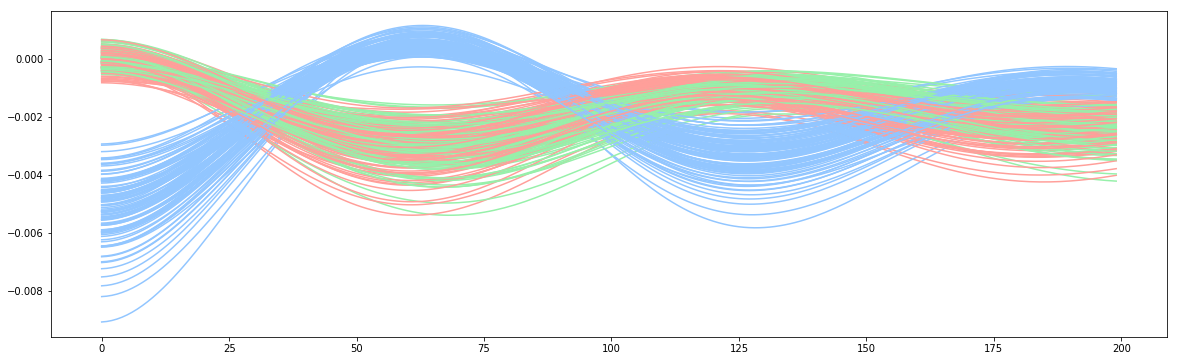

In [21]:
plt.figure(figsize=(20,6))

for i in range(100):
    filename = 'output/' + str(i) + '.hdf5'
    run_instance(m0, cov0, filename)
    h5file = h5py.File(filename,'r')
    traj_mat = h5file.get('matrix')
    traj = np.array(traj_mat).reshape(traj_mat.shape[0]*traj_mat.shape[1])
    traj = traj.reshape(traj_mat.shape[0], traj_mat.shape[1], order = 'F')
    plt.plot(traj[4,:], color = pastel[0])
    plt.plot(traj[4+10,:], color = pastel[1])
    plt.plot(traj[4+20,:], color = pastel[2])